In [ ]:
# https://www.kaggle.com/datasets/claudiodaloiso/stock-data-of-googl-aapl-and-msft-2020-2025?select=GOOGL.csv

In [13]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv("GOOGL.csv")

In [15]:
df

,Date,Close,High,Low,Open,Volume
0,2020-01-02,68.186813,68.186813,67.081324,67.176978,27278000
1,2020-01-03,67.830109,68.439404,67.122674,67.156555,23408000
2,2020-01-06,69.638054,69.663459,67.306008,67.337388,46768000
3,2020-01-07,69.503548,69.921535,69.326691,69.770083,34330000
4,2020-01-08,69.998245,70.337515,69.379988,69.489089,35314000
...,...,...,...,...,...,...
1253,2024-12-24,196.110001,196.110001,193.779999,194.839996,10403300
1254,2024-12-26,195.600006,196.750000,194.380005,195.149994,12046600
1255,2024-12-27,192.759995,195.320007,190.649994,194.949997,18891400
1256,2024-12-30,191.240005,192.550003,189.119995,189.800003,14264700


In [16]:
df['SMA_10'] = df['Close'].rolling(window=10).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()

In [17]:
df['Prev_Close'] = df['Close'].shift(1)

In [18]:
df['Daily_Change'] = df.Close - df['Prev_Close']

In [19]:
df.dropna(inplace=True) 

In [20]:
df.isna().sum()

Date            0
Close           0
High            0
Low             0
Open            0
Volume          0
SMA_10          0
SMA_50          0
Prev_Close      0
Daily_Change    0
dtype: int64

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Ensure no missing values
df.dropna(inplace=True)

# Define Features and Target
features = ['SMA_10', 'SMA_50', 'Prev_Close', 'Daily_Change']  # Features used for prediction
target = 'Close'  # Target variable (Stock Price)

X = df[features]
y = df[target]

# Split Data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# Standardize Features (optional for better convergence)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 967, Testing samples: 242


In [22]:
from sklearn.linear_model import LinearRegression

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make Predictions
y_pred_lr = lr_model.predict(X_test)


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate Errors
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Linear Regression - Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Linear Regression - Root Mean Squared Error (RMSE): {rmse_lr:.2f}")


Linear Regression - Mean Absolute Error (MAE): 0.00
Linear Regression - Root Mean Squared Error (RMSE): 0.00


In [24]:
y_test

1016    140.959030
1017    142.961761
1018    145.851288
1019    145.462692
1020    146.508881
           ...    
1253    196.110001
1254    195.600006
1255    192.759995
1256    191.240005
1257    189.300003
Name: Close, Length: 242, dtype: float64

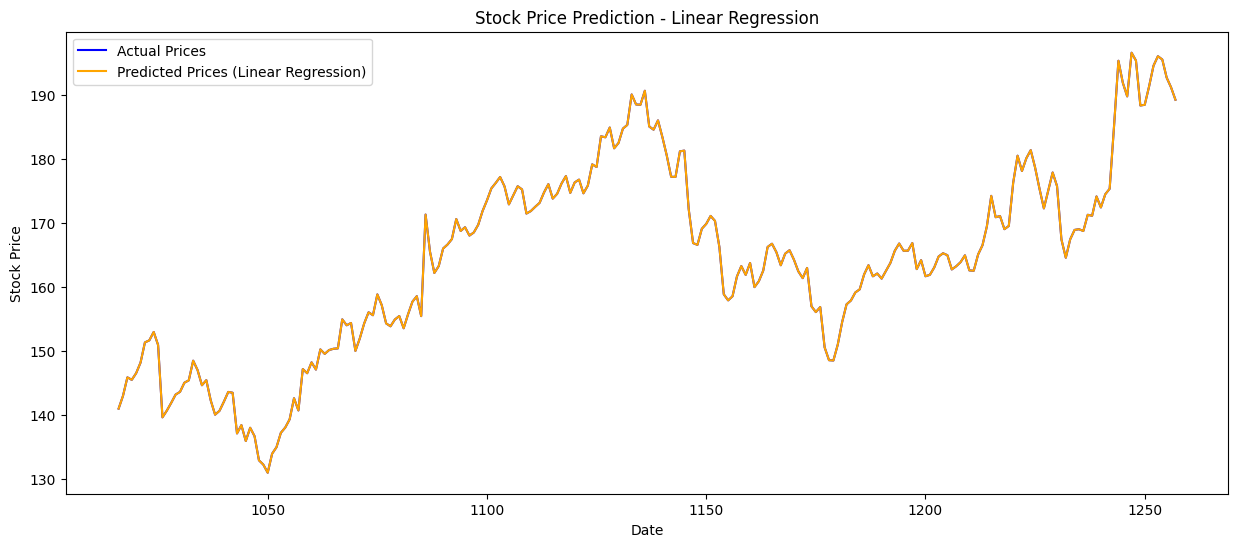

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(y_test.index, y_test, label="Actual Prices", color='blue')
plt.plot(y_test.index, y_pred_lr, label="Predicted Prices (Linear Regression)", color='orange')
plt.legend()
plt.title("Stock Price Prediction - Linear Regression")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()
